In [41]:
import pandas as pd
import numpy as np

LOADING AND CLEANING FIFA DATA

In [42]:
players = pd.read_csv("D:\coding\lol api\male_players24.csv")

C:\Users\France\AppData\Local\Temp\ipykernel_12196\2628611078.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("D:\coding\lol api\male_players24.csv")


In [43]:
players

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,220806,https://sofifa.com/player/220806/ellis-redman/...,15.0,2.0,2014-09-18,E. Redman,Ellis Redman,CB,41,61,...,38,38,38,37,40,41,41,41,40,10
180017,225509,https://sofifa.com/player/225509/aaron-collins...,15.0,2.0,2014-09-18,A. Collins,Aaron Graham John Collins,ST,41,50,...,30,30,30,31,32,31,31,31,32,14
180018,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,15.0,2.0,2014-09-18,P. Żemło,Piotr Żemło,"LM, LB",40,50,...,46,46,46,48,51-1,53-3,53-3,53-3,51-1,12
180019,222947,https://sofifa.com/player/222947/tom-davies/15...,15.0,2.0,2014-09-18,T. Davies,Thomas Christopher Davies,CB,40,49,...,36,36,36,37,39,40,40,40,39,13


In [44]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [45]:
players = players.dropna(subset=features)

In [46]:
data = players[features].copy()

In [47]:
data

,overall,potential,wage_eur,value_eur,age
0,91,94,230000.0,181500000.0,24
1,91,94,340000.0,185000000.0,22
2,91,91,350000.0,103000000.0,32
3,90,90,23000.0,41000000.0,36
4,90,90,95000.0,51000000.0,35
...,...,...,...,...,...
180015,42,52,2000.0,20000.0,18
180016,41,61,2000.0,20000.0,17
180017,41,50,2000.0,30000.0,17
180018,40,50,2000.0,15000.0,18


SCALING THE DATA

In [48]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [49]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,177868.000000,177868.000000,177868.000000,177868.000000,177868.000000
mean,5.756778,6.344298,1.176541,1.122585,3.932049
std,1.301270,1.203816,0.376872,0.318783,1.499816
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.888889,5.423077,1.026110,1.016701,2.612903
50%,5.814815,6.384615,1.060923,1.038608,3.903226
75%,6.555556,7.153846,1.165361,1.092732,4.870968
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [50]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.444444,10.807692,4.994778,10.355667,3.580645
1,10.444444,10.807692,6.909487,10.536080,2.935484
2,10.444444,10.230769,7.083551,6.309254,6.161290
3,10.259259,10.038462,1.391645,3.113361,7.451613
4,10.259259,10.038462,2.644909,3.628828,7.129032


INITIALIZE RANDOM CENTROIDS

In [51]:
def random_centroids(data, k):
    centroids = []
    for i  in range(k):
        centroid = data.apply(lambda x: float(x.sample().iloc[0]))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [52]:
centroids = random_centroids(data, 5)

In [53]:
centroids

,0,1,2,3,4
overall,5.814815,4.333333,5.814815,5.629630,8.037037
potential,7.153846,6.000000,7.346154,5.807692,7.730769
wage_eur,1.043516,1.078329,1.078329,1.026110,1.095735
value_eur,1.103042,1.010773,1.007680,1.050206,1.012835
age,3.903226,6.483871,3.258065,6.161290,5.838710


FINDING CLUSTER LABELS FOR EACH DATA POINT

In [54]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [55]:
labels = get_labels(data, centroids)

In [56]:
labels.value_counts()

2    69640
0    41521
3    41399
4    20779
1     4529
Name: count, dtype: int64

UPDATE CENTROID VALUES

In [57]:
def new_centroids(data, labels, k):
    # Ensure it returns a pandas DataFrame
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

PLOTTING K-MEANS ITERATIONS

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [59]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()



PULLING THE ALGORITHMS TOGETHER

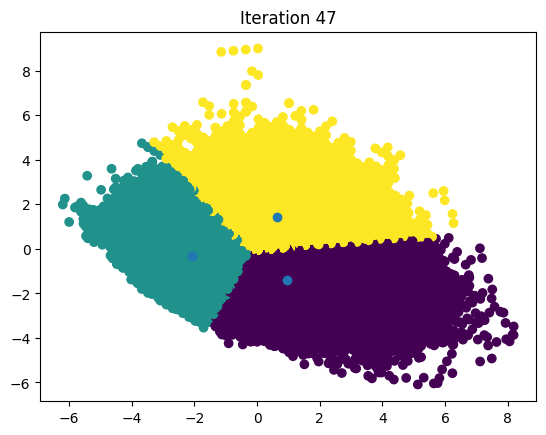

In [60]:
max_iterations = 100
centroid_count = 3

# Initialize centroids as a DataFrame
centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()  # Empty DataFrame
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids.copy()  # Avoid overwriting
    labels = get_labels(data, centroids)  # Ensure it works with DataFrame
    centroids = new_centroids(data, labels, centroid_count)  # Force DataFrame
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [61]:
centroids

,0,1,2
overall,6.845779,4.365212,5.873929
potential,7.552866,5.823793,5.600244
wage_eur,1.334982,1.026161,1.102689
value_eur,1.262337,1.019957,1.045957
age,3.489999,2.475536,5.284995


In [62]:
players[labels == 1][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
8182,Narcisso Mo,67,67,4000.0,1100000.0,23
8183,Botelhinonsa,67,67,4000.0,1100000.0,23
8605,J. Lavega,66,74,500.0,1800000.0,18
8663,M. Keller,66,73,3000.0,1400000.0,20
8727,K. Etete,66,72,5000.0,1400000.0,21
...,...,...,...,...,...,...
180015,S. Ramsbottom,42,52,2000.0,20000.0,18
180016,E. Redman,41,61,2000.0,20000.0,17
180017,A. Collins,41,50,2000.0,30000.0,17
180018,P. Żemło,40,50,2000.0,15000.0,18


COMPARING OUR IMPLEMENTATIONS TO SCIKIT-LEARN

In [63]:
from sklearn.cluster import KMeans

In [64]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [65]:
centroids = kmeans.cluster_centers_

In [66]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,4.639992,7.157888,5.901499
potential,6.060974,7.664453,5.615037
wage_eur,1.031888,1.476176,1.101470
value_eur,1.025443,1.360658,1.042911
age,2.643487,3.892269,5.414222
